In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [2]:
import pickle

In [3]:
with open('df_cic_train50_no_preprocessing_labelencoder', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (961529, 78)
X teste =  (412085, 78)
y multiclasse treino =  (961529,)
y multiclasse teste =  (412085,)
y binário treino =  (961529,)
y binário teste =  (412085,)


In [5]:
y_train50_binary_train.value_counts()

0    795558
1    165971
Name: Label_binary, dtype: int64

In [6]:
y_train50_multiclass_train.value_counts()

BENIGN          795558
DoS              88577
PortScan         55460
DDoS             15615
BruteForce        4833
WebAttack          779
BotNet             689
Infiltration        13
Heartbleed           5
Name: Label_multiclass, dtype: int64

In [7]:
y_train50_binary_test.value_counts()

0    340990
1     71095
Name: Label_binary, dtype: int64

In [8]:
y_train50_multiclass_test.value_counts()

BENIGN          340990
DoS              37753
PortScan         24004
DDoS              6647
BruteForce        2084
WebAttack          310
BotNet             293
Infiltration         4
Name: Label_multiclass, dtype: int64

In [9]:
X_train50_train.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
586419,24,215,2,2,46,46,23,23,23.0,0.000000,...,1,32,0.0,0.0,0,0,0.0,0.0,0,0
1295441,24,160,2,2,90,122,45,45,45.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
925705,24,60629,1,1,49,161,49,49,49.0,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
865489,27,84839112,6,7,342,11595,324,0,57.0,130.835775,...,3,20,9993.0,0.0,9993,9993,84700000.0,0.0,84700000,84700000
289527,27,5325819,3,1,0,0,0,0,0.0,0.000000,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0


In [10]:
print(y_train50_multiclass_train.unique())
print(y_train50_binary_train.unique())

['BENIGN' 'DoS' 'DDoS' 'PortScan' 'WebAttack' 'BruteForce' 'BotNet'
 'Infiltration' 'Heartbleed']
[0 1]


In [11]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [12]:
X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [13]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [14]:
with open('df_cic_test50_no_preprocessing_labelencoder', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [15]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1373614, 78)
y multiclasse =  (1373614,)
y binário =  (1373614,)


In [16]:
y_test50_multiclass.value_counts()

BENIGN          1136548
DoS              126330
PortScan          79464
DDoS              22262
BruteForce         6917
WebAttack          1089
BotNet              982
Infiltration         17
Heartbleed            5
Name: Label_multiclass, dtype: int64

In [17]:
y_test50_binary.value_counts()

0    1136548
1     237066
Name: Label_binary, dtype: int64

In [18]:
X_test50.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,24,154,2,2,70,102,35,35,35.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
1,24,60757,2,2,60,248,30,30,30.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
2,24,30266,1,1,56,121,56,56,56.0,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
3,40027,1,2,0,37,0,37,0,18.5,26.162951,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
4,24,196,2,2,80,336,40,40,40.0,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0


In [19]:
print(y_test50_multiclass.unique())
print(y_test50_binary.unique())

['BENIGN' 'DoS' 'PortScan' 'DDoS' 'BotNet' 'WebAttack' 'BruteForce'
 'Heartbleed' 'Infiltration']
[0 1]


In [20]:
#X_test50.shape

In [21]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

In [22]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [23]:
X_test50 = X_test50.to_numpy()
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [24]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Algoritmo kNN para Train e Validation - Train50

In [25]:
from sklearn.neighbors import KNeighborsClassifier

### Predição train50 binária

In [26]:
knn_train50_binary = KNeighborsClassifier(n_neighbors=4, p=2)

In [27]:
knn_train50_binary.fit(X_train50_train, y_train50_binary_train)

KNeighborsClassifier(n_neighbors=4)

In [28]:
predict_train50_binary = knn_train50_binary.predict(X_train50_test)

In [29]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9963818144314887

### Visualização da árvore binária

In [32]:
#from sklearn import tree
#from dtreeviz.trees import dtreeviz
#from matplotlib import pyplot as plt
#plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
#plt.rcParams.update({'font.size': 14})

In [33]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [34]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

In [35]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [36]:
knn_train50_multiclass =  KNeighborsClassifier(n_neighbors=4, p=2)

In [37]:
knn_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

KNeighborsClassifier(n_neighbors=4)

In [38]:
predict_train50_multiclass = knn_train50_multiclass.predict(X_train50_test)

In [39]:
predict_train50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [40]:
y_train50_multiclass_test

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [41]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9961075991603674

### Visualização da árvore multiclasse

In [42]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [43]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

In [44]:
#fig, ax = plt.subplots(figsize=(20,30))
#lgb.plot_importance(lgb_train50_binary, ax=ax)

In [45]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [46]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.997836  0.997792  0.997814    340990
           1   0.989411  0.989620  0.989515     71095

    accuracy                       0.996382    412085
   macro avg   0.993623  0.993706  0.993664    412085
weighted avg   0.996382  0.996382  0.996382    412085



In [47]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.997836  0.997792  0.997814    340990
      BotNet   0.877005  0.559727  0.683333       293
  BruteForce   0.997099  0.989443  0.993256      2084
        DDoS   0.967126  0.982549  0.974776      6647
         DoS   0.985517  0.985935  0.985726     37753
Infiltration   1.000000  0.000000  0.000000         4
    PortScan   0.997918  0.998542  0.998230     24004
   WebAttack   0.942675  0.954839  0.948718       310

    accuracy                       0.996108    412085
   macro avg   0.970647  0.808603  0.822732    412085
weighted avg   0.996085  0.996108  0.996066    412085



### Cross Validation do train50

In [48]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(knn_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [49]:
score_cv_train50_binary

array([0.99653677, 0.99621437, 0.99601676, 0.99625597, 0.99692157,
       0.99615197, 0.99653677, 0.99653677, 0.99643277, 0.99647433])

In [50]:
cv_result_train50_binary

[0.9964078047219871]

In [51]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(knn_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [52]:
score_cv_train50_multiclass

array([0.99618317, 0.99579836, 0.99565276, 0.99589196, 0.99655757,
       0.99585036, 0.99623517, 0.99616237, 0.99599596, 0.99608952])

In [53]:
cv_result_train50_multiclass

[0.9960417211002515]

### Matriz de Confusão do train50

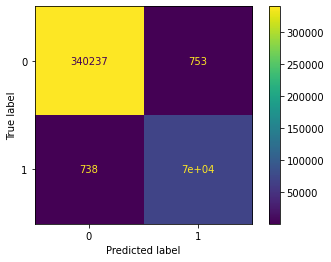

In [54]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

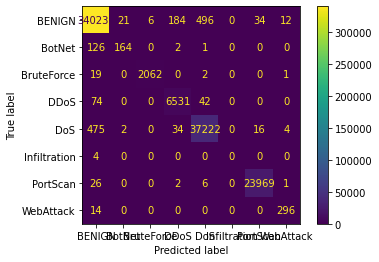

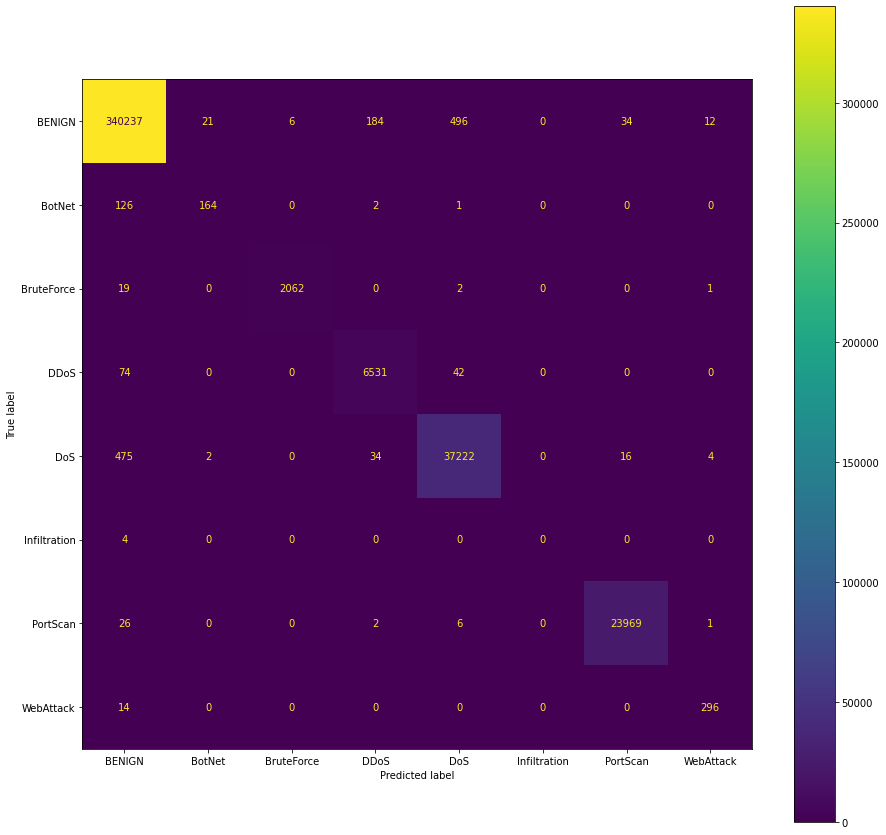

In [55]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)

# Algoritmo kNN para Test50

### Predição Test50 binária

In [56]:
predict_test50_binary = knn_train50_binary.predict(X_test50)

In [57]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [58]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [59]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9973959205424523

### Predição test50 multiclasse

In [60]:
predict_test50_multiclass = knn_train50_multiclass.predict(X_test50)

In [61]:
predict_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [62]:
y_test50_multiclass

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'PortScan'],
      dtype=object)

In [63]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9971964467455923

### Precision e Recall do test50

In [64]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.998328  0.998525  0.998427   1136548
           1   0.992924  0.991981  0.992452    237066

    accuracy                       0.997396   1373614
   macro avg   0.995626  0.995253  0.995439   1373614
weighted avg   0.997395  0.997396  0.997395   1373614



In [65]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

              precision    recall  f1-score   support

      BENIGN   0.998328  0.998525  0.998427   1136548
      BotNet   0.935435  0.634420  0.756068       982
  BruteForce   0.998252  0.990603  0.994413      6917
        DDoS   0.978467  0.987917  0.983169     22262
         DoS   0.990000  0.989781  0.989890    126330
  Heartbleed   1.000000  0.800000  0.888889         5
Infiltration   1.000000  0.000000  0.000000        17
    PortScan   0.998603  0.998742  0.998672     79464
   WebAttack   0.964862  0.932966  0.948646      1089

    accuracy                       0.997196   1373614
   macro avg   0.984883  0.814773  0.839797   1373614
weighted avg   0.997184  0.997196  0.997163   1373614



### Matriz de Confusão do test50

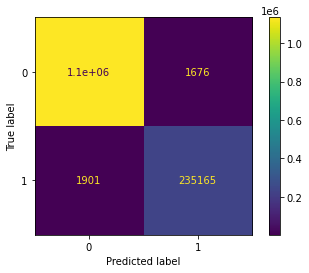

In [66]:
ConfusionMatrixDisplay.from_estimator(knn_train50_binary, X_test50, y_test50_binary)
plt.show()

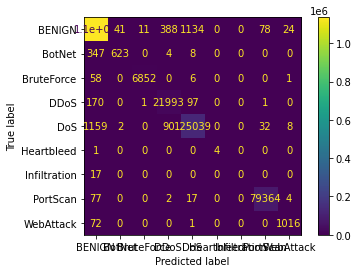

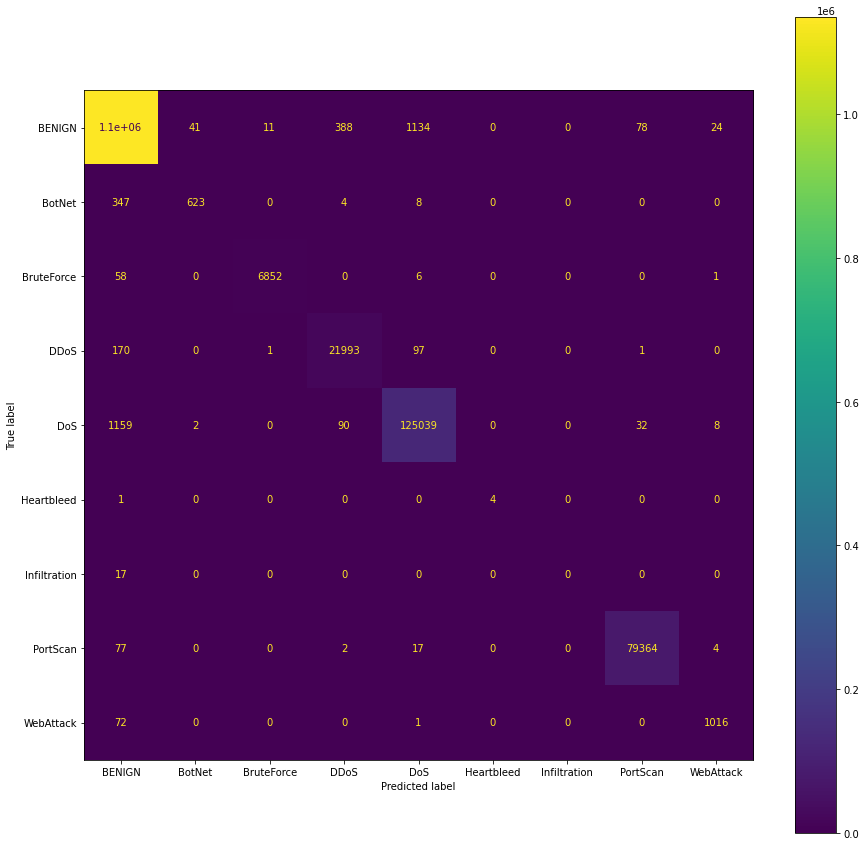

In [67]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_knn_multiclass_train = ConfusionMatrixDisplay.from_estimator(knn_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_knn_multiclass_train.plot(ax=ax)